<a href="https://colab.research.google.com/github/Vinicius-DataAnalyst/portfolio/blob/TrainingPython/01_PROJ_Unicorn_March2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unicorns**
Analisando base de dados de startups que viraram unicornios (+ US$ 1 Bi)

# Montando o drive e importando bibliotecas

## Caminho do arquivo

In [ ]:
csv_path = '/content/drive/MyDrive/Colab Notebooks/recursos/Startups+in+2021+end.csv'

## Bibliotecas importadas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Impressao incial

## Lendo e abrindo a base

In [ ]:
df = pd.read_csv(csv_path).sort_values(by=['Valuation ($B)'], ascending = False)

In [ ]:
df.sample(5)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
266,266,BharatPe,$2.85,7/30/2021,India,New Delhi,Fintech,"Insight Partners, Sequoia Capital India, BEENEXT"
399,399,Advance Intelligence Group,$2,9/23/2021,Singapore,NaN,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund"
98,98,Airtable,$5.77,11/15/2018,United States,San Francisco,Internet software & services,"Caffeinated Capital, CRV, Founder Collective"
872,872,NIUM,$1,7/13/2021,Singapore,NaN,Fintech,"Vertex Ventures SE Asia, Global Founders Capit..."
570,570,HeartFlow,$1.3,12/4/2017,United States,Redwood City,Health,"BlueCross BlueShield Venture Partners, US Vent..."


# Discutindo sobre possíveis perguntas e respostas sobre essa base

O que temos:


1.   Nome da compania
2.   Valuation
3.   Início
4.   País
5.   Cidade
6.   Tipo de atividade
7.   Investidores

Perguntas possíveis iniciais:
* Gere um gráfico que mostre a velocidade com a qual as top 10 mais rápidas cresceram e as top últimas cresceram.

* Qual é a distribuição por país desses unicórnios?

* Qual o tipo de atividade desses unicórnios?

Transformações necessárias antes de gerar informação útil:
* Verificar qualidade dos dados
* verificar tipo dos dados

# Qualidade dos dados

In [ ]:
# verficar o shape: linhas e colunas
df.shape

(936, 8)

In [ ]:
# verificando tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 2 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 65.8+ KB


## Observações dos tipos de dados
1. O valuation deve ter o sifrão ($) retirado para então transformar esse campo em float
2. Date Joined deve ser trasnformado para virar DateTime
3. Coluna 'Unnamed: 0' deve ser retirada pois coincide com o próprio index. Então o index já pode ser o id da coluna nesse cenário simples.

## Avaliar valores nulos

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
Valuation ($B),0
Date Joined,0
Country,0
City,15
Industry,0
Select Investors,1


<Axes: title={'center': 'Analisando os campos nulos'}>

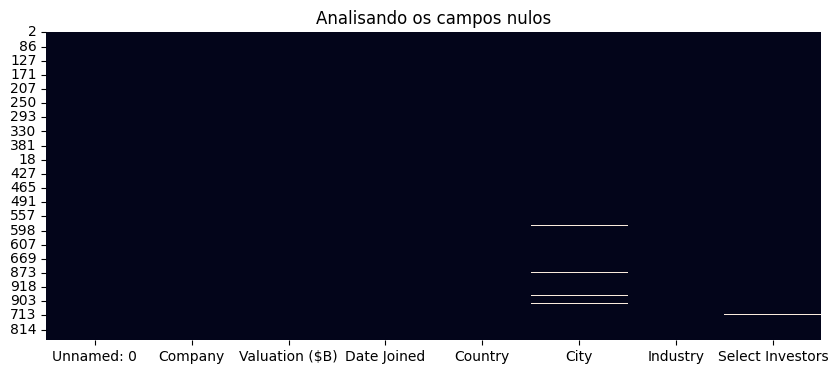

In [ ]:
# visao gráfica
plt.figure( figsize=(10,4) )
plt.title('Analisando os campos nulos')
sns.heatmap( df.isnull(), cbar=False )

## Avaliando campos unicos

In [ ]:
df.nunique()

,0
Unnamed: 0,936
Company,935
Valuation ($B),192
Date Joined,589
Country,47
City,239
Industry,17
Select Investors,920


## Explorando o campo Industry

In [ ]:
df['Industry'].unique()

array(['Fintech', 'Travel', 'Internet software & services', 'Other',
       'Cybersecurity', 'E-commerce & direct-to-consumer',
       'Mobile & telecommunications', 'Auto & transportation', 'Health',
       'Artificial intelligence', 'Hardware', 'Consumer & retail',
       'Data management & analytics',
       'Supply chain, logistics, & delivery', 'Edtech', 'Finttech',
       'Artificial Intelligence'], dtype=object)

In [ ]:
# respondendo qual é o setor mais comum
df['Industry'].value_counts()

,count
Industry,
Fintech,190
Internet software & services,167
E-commerce & direct-to-consumer,102
Artificial intelligence,69
Health,63
Other,51
"Supply chain, logistics, & delivery",51
Cybersecurity,41
Mobile & telecommunications,37


In [ ]:
# respondendo qual é o setor mais comum em porcentagem
df['Industry'].value_counts( normalize = True)

,proportion
Industry,
Fintech,0.202991
Internet software & services,0.178419
E-commerce & direct-to-consumer,0.108974
Artificial intelligence,0.073718
Health,0.067308
Other,0.054487
"Supply chain, logistics, & delivery",0.054487
Cybersecurity,0.043803
Mobile & telecommunications,0.039530


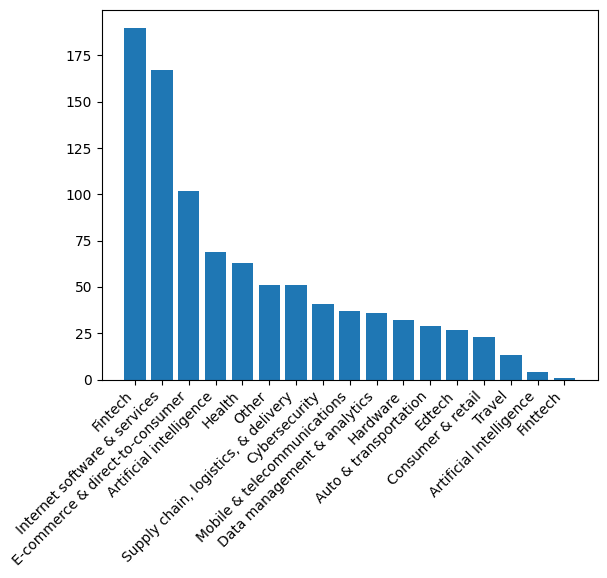

In [ ]:
# criando um gráfico dos principais setores do unicornios
plt.bar( df['Industry'].value_counts().index, df['Industry'].value_counts() )
plt.xticks( rotation = 45, ha = 'right');

In [ ]:
# criando a lista de países agregados por numero de unicornios
perc_round_country = round(df['Country'].value_counts( normalize = True) * 100, 1)

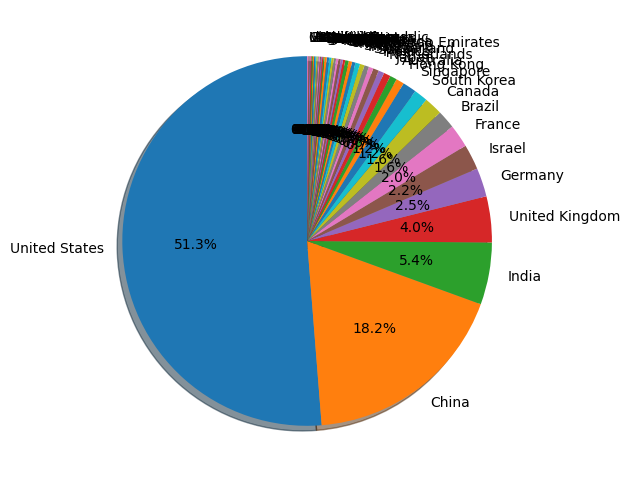

In [ ]:
plt.figure( figsize = (15,6) )
plt.title("")
plt.pie(
    perc_round_country,
    labels = perc_round_country.index,
    shadow=True,
    autopct='%1.1f%%',
    startangle=90
);

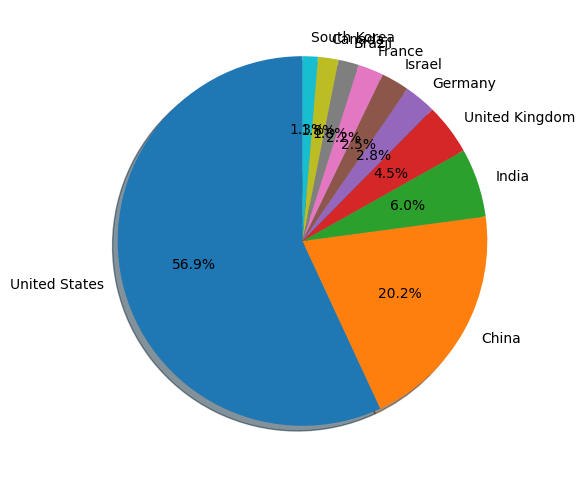

In [ ]:
# vamos trazer apenas os top 10 paises para limpar um pouco o gráfico
plt.figure( figsize = (15,6) )
plt.title("")
plt.pie(
    perc_round_country.head(10),
    labels = perc_round_country.index[0:10],
    shadow=True,
    autopct='%1.1f%%',
    startangle=90,
);

In [ ]:
Observando o tipo de dado na data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 2 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 65.8+ KB


In [ ]:
# convertendo 'Date Joined' para DateTime
c = pd.to_datetime( df['Date Joined'] )

In [ ]:
#Extraindo o ano e mês
df['Month'] = pd.DatetimeIndex( df['Date Joined'] ).month
df['Year'] = pd.DatetimeIndex( df['Date Joined'] ).year

df.head(2)

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
53,53,OYO Rooms,$9.6,2018-09-25,India,Gurugram,Travel,"SoftBank Group, Sequoia Capital India,Lightspe...",9,2018


In [ ]:
df.rename(columns={'Unnamed: 0' : 'Id'}, inplace = True)

In [ ]:
tb_pais_data = df.groupby( by=['Country', 'Month', 'Year'], ).count()['Id'].reset_index()
tb_pais_data

,Country,Month,Year,Id
0,Argentina,8,2021,1
1,Australia,1,2018,1
2,Australia,3,2019,1
3,Australia,5,2021,1
4,Australia,7,2021,2
...,...,...,...,...
373,United States,12,2019,2
374,United States,12,2020,12
375,United States,12,2021,8
376,"United States,",9,2021,1


In [ ]:
tb_pais_data